d:\anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5389.36it/s]

after 100 epoch, loss:0.12852460145950317
after 200 epoch, loss:0.030220935121178627
after 300 epoch, loss:0.007106074597686529
after 400 epoch, loss:0.0016709244810044765
after 500 epoch, loss:0.00039288814878091216
after 600 epoch, loss:9.238558413926512e-05
after 700 epoch, loss:2.172517815779429e-05
after 800 epoch, loss:5.107650849822676e-06
after 900 epoch, loss:1.2012258139293408e-06
after 1000 epoch, loss:2.8235655236130697e-07
w =  1.9996463060379028
b =  0.0008042913395911455
x = tensor([4.]), y = tensor([7.9994])


<IPython.core.display.Javascript object>


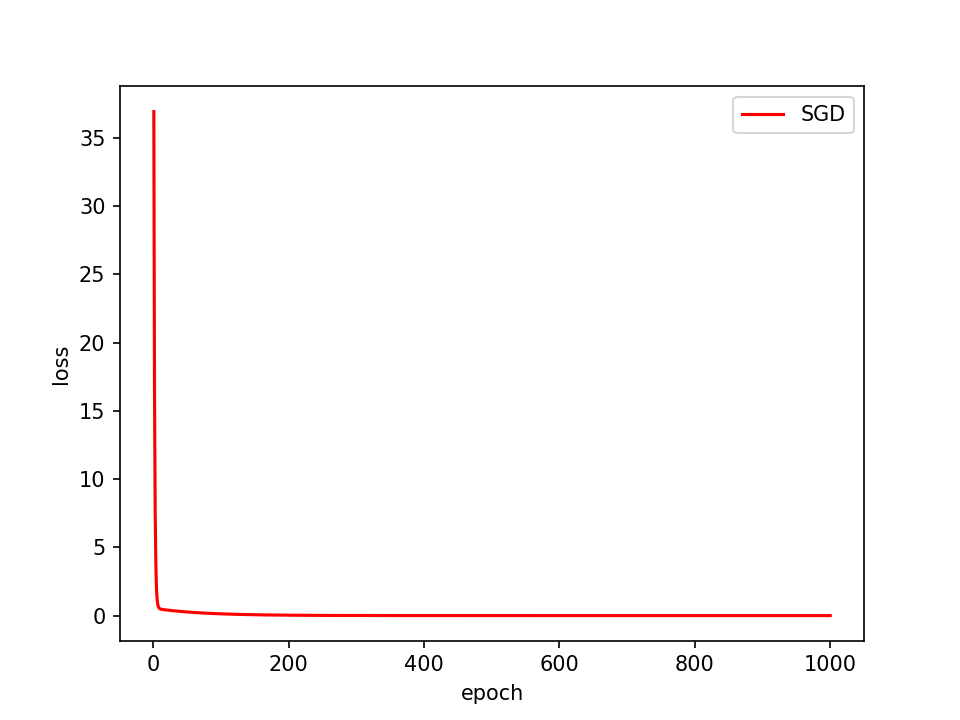

In [79]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# 准备数据
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

# 定义model
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)  # 参数1,1 分别表示输入和输出维度
    
    def forward(self, x):  # override 
        y_pred = self.linear(x)
        return y_pred
    
model = LinearModel()  # 实例化

# 构造损失函数和优化器
learning_rate = 0.01
criterion = torch.nn.MSELoss(size_average = False)  # 损失函数(准则)  损失是否求平均
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)  # 优化器SGD
# optimizer_Adagrad = torch.optim.Adagrad(model.parameters(), lr = learning_rate)
# optimizer_Adam = torch.optim.Adam(model.parameters(), lr = learning_rate)
# optimizer_RProp = torch.optim.Rprop(model.parameters(),lr = learning_rate)

# 循环迭代训练
epoch = 1000
loss_ls = []
# loss_Adagrad_ls = []
# loss_Adam_ls = []
# loss_RProp_ls = []

for i in tqdm(range(epoch)):
    y_pred = model(x_data)  # 前向传播
    
    loss = criterion(y_pred, y_data)
    loss_ls.append(loss)
    
#     loss_Adagrad = criterion(y_pred, y_data)
#     loss_Adagrad_ls.append(loss_Adagrad)
    
#     loss_Adam = criterion(y_pred, y_data)
#     loss_Adam_ls.append(loss_Adam)

#     loss_RProp = criterion(y_pred, y_data)
#     loss_RProp_ls.append(loss_RProp)

    if (i+1)%100 == 0:
        print('after {} epoch, loss:{}'.format(i+1, loss))  # loss是标量
    
    optimizer.zero_grad()  #  反向传播前进行梯度清零
#     optimizer_Adagrad.zero_grad()
#     optimizer_Adam.zero_grad()
#     optimizer_RProp.zero_grad()

    loss.backward() # 反向传播
#     loss_Adagrad.backward()
#     loss_Adam.backward()
#     loss_RProp.backward()  

    optimizer.step()  # 更新权重
#     optimizer_Adagrad.step()
#     optimizer_Adam.step()
#     optimizer_RProp.step()

    
# 输出最终权重
print('w = ',model.linear.weight.item())
print('b = ',model.linear.bias.item())
    
# 测试模型
x_test = torch.Tensor([4.0])
y_pred = model(x_test)
print('x = {}, y = {}'.format(x_test.data, y_pred.data))  # 矩阵中只有一个数时候可以直接使用item输出对应的标量

epoch_ls = np.arange(1, epoch+1, 1)
plt.plot(epoch_ls, loss_ls,color = 'r',label = 'SGD')
# plt.plot(epoch_ls, loss_Adagrad_ls, label='Adagrad')
# plt.plot(epoch_ls, loss_Adam_ls, label='Adam')
# plt.plot(epoch_ls, loss_RProp_ls,color = 'r',label = 'RProp')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [61]:
model

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)